In [5]:
from Panel_Simulation import Panel_Simulator
from UsefullMiniFunctions import plt_U_I
import matplotlib.pyplot as plt
from tqdm import tqdm
import multiprocessing as mp
import pandas as pd

def module_discription(waver_per_string=10,
                      string_per_module = 3,
                       I_SC = 5.17, #A
                       shunt_resistance = 50, #Ohm,
                       reverse_leakage_current_1 = 1e-9, #nA,
                       N1 = 2,
                       reverse_leakage_current_2 = 1e-9, #nA,
                       N2 = 1,
                       serial_resistance = 0.001 #Ohm
                      ):
    waver_list = np.ones([string_per_module, waver_per_string, 7])
    waver_list[:, :, 0] = I_SC  # generator_current
    waver_list[:, :, 1] = shunt_resistance
    waver_list[:, :, 2] = reverse_leakage_current_1
    waver_list[:, :, 3] = N1
    waver_list[:, :, 4] = reverse_leakage_current_2
    waver_list[:, :, 5] = N2
    waver_list[:, :, 6] = serial_resistance
    return waver_list

In [50]:
waver_per_string=10
string_per_module = 3
I_SC = 5.17 #A
shunt_resistance = 50 #Ohm,
reverse_leakage_current1 = 1e-9 #nA,
N1 = 2
reverse_leakage_current2 = 1e-9 #nA,
N2 = 1
serial_resistance = 0.001 #Ohm

bypass_IS=10e-9
bypass_N=1.0
bypass_RS=5000.0
bypass_BV=50

In [51]:
module = module_discription(  
                                               waver_per_string,
                                               string_per_module,
                                               I_SC,
                                               shunt_resistance,
                                               reverse_leakage_current1,
                                               N1,
                                               reverse_leakage_current2,
                                               N2,
                                               serial_resistance
                                            )
module[0,1:4,0] =3
print(module)

[[[5.17e+00 5.00e+01 1.00e-09 2.00e+00 1.00e-09 1.00e+00 1.00e-03]
  [3.00e+00 5.00e+01 1.00e-09 2.00e+00 1.00e-09 1.00e+00 1.00e-03]
  [3.00e+00 5.00e+01 1.00e-09 2.00e+00 1.00e-09 1.00e+00 1.00e-03]
  [3.00e+00 5.00e+01 1.00e-09 2.00e+00 1.00e-09 1.00e+00 1.00e-03]
  [5.17e+00 5.00e+01 1.00e-09 2.00e+00 1.00e-09 1.00e+00 1.00e-03]
  [5.17e+00 5.00e+01 1.00e-09 2.00e+00 1.00e-09 1.00e+00 1.00e-03]
  [5.17e+00 5.00e+01 1.00e-09 2.00e+00 1.00e-09 1.00e+00 1.00e-03]
  [5.17e+00 5.00e+01 1.00e-09 2.00e+00 1.00e-09 1.00e+00 1.00e-03]
  [5.17e+00 5.00e+01 1.00e-09 2.00e+00 1.00e-09 1.00e+00 1.00e-03]
  [5.17e+00 5.00e+01 1.00e-09 2.00e+00 1.00e-09 1.00e+00 1.00e-03]]

 [[5.17e+00 5.00e+01 1.00e-09 2.00e+00 1.00e-09 1.00e+00 1.00e-03]
  [5.17e+00 5.00e+01 1.00e-09 2.00e+00 1.00e-09 1.00e+00 1.00e-03]
  [5.17e+00 5.00e+01 1.00e-09 2.00e+00 1.00e-09 1.00e+00 1.00e-03]
  [5.17e+00 5.00e+01 1.00e-09 2.00e+00 1.00e-09 1.00e+00 1.00e-03]
  [5.17e+00 5.00e+01 1.00e-09 2.00e+00 1.00e-09 1.00e+00 1.0

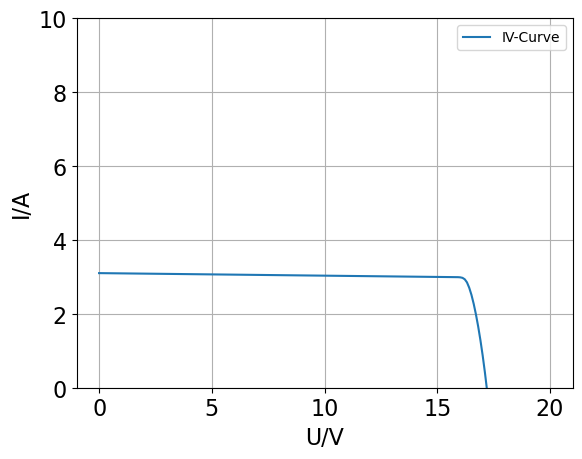

In [52]:
sim = Panel_Simulator()


module_circuit = sim.create_module(module,bypass_IS=bypass_IS, bypass_N=bypass_N, bypass_RS=bypass_RS, bypass_BV=bypass_BV)


u,i = sim.analyse_module( U_start = 0, U_end = 20, resolution=201, temperature=25, nominal_temperature=25)


plt.plot(u,i, label="IV-Curve")
plt.ylim(0,10)
plt.legend()
plt_U_I()
plt.show()